In [96]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
from CoreFunctions import *
from RiskReturn import *
from PyPortfolio import *
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','^FTSE', '^NSEI'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


In [40]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [47]:

portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')

portfolio_object.GlobalMinVariance

(True, array([0.        , 0.72919942, 0.27080058]))

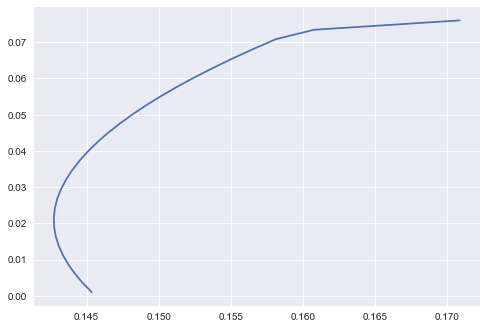

In [86]:
axes = plt.plot(portfolio_object.MeanVarianceOpt[0]['Portfolio Volatility'],portfolio_object.MeanVarianceOpt[0]['Portfolio Return'])

In [59]:
a = global_minimum_variance(return_series=riskreturn_object.get_return_series(), periodicity='M')

In [61]:
for i in a[1]:
    print(i*100)

71.57414386635898
28.42585613364101
9.54097911787244e-16


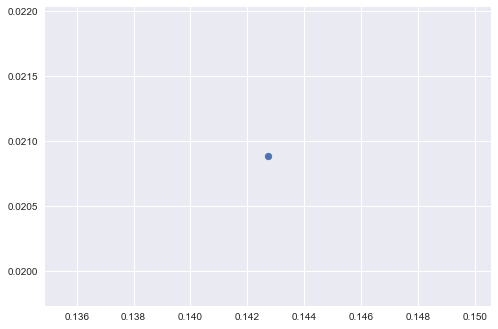

In [84]:
wt = a[1]
y = annualized_return(portfolio_returns(wt, returns_monthly), 'M')
x = portfolio_volatility(wt,returns_monthly) * math.sqrt(12)
plt.scatter(x, y)